In [1]:
import os, struct
import matplotlib as plt
from array import array as pyarray
import pandas as pd
from openpyxl import load_workbook
from pylab import *
import numpy as np

In [2]:
def load_NMNIST(dataset="training", digits=range(10), path=r'E:\Users\Shashi\OneDrive\Datasets\Shapes'):
    
    if dataset == "training":
        fname_img = os.path.join(path, 'Shapes_1_1_Train_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Train_Labels.dat')
    elif dataset == "testing":
        fname_img = os.path.join(path, 'Shapes_1_1_Test_Features.dat')
        fname_lbl = os.path.join(path, 'Shapes_1_1_Test_Labels.dat')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    return images, labels

In [3]:
def vectortoimg(v,show=True):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [4]:
import keras

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


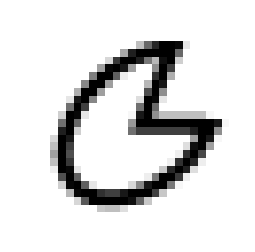

In [5]:
path= os.path.join(os.path.curdir, 'data')
images, labels = load_NMNIST('training', digits=[0,1,2], path=path)

flatimages = list()
for i in images:
    flatimages.append(i.ravel())
x_train = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
y_train=labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza
vectortoimg(x_train[1])

print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg(x_train[np.random.randint(len(y_train))],show=False)
plt.show()

In [6]:
images.shape

(60000, 28, 28)

In [7]:
labels.shape

(60000, 1)

In [8]:
images, labels = load_NMNIST('testing', digits=[0,1,2], path=path)
flatimages = list()
for i in images:
    flatimages.append(i.ravel())
x_test = asarray(flatimages) # X now contains 60000 feature vectors, each of dimension 784
y_test = labels # T contains class labels with 0->Triangle, 1->Square, 2->Pizza

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

## single fully-connected neural layer as encoder and as decoder

In [10]:
# this is the size of our encoded representations
encoding_dim = 32  # 3 floats -> 3 floats represents 3 classes

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

## Let's also create a separate encoder model

In [11]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

## decoder model

In [12]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

## Use Crossentropy loss, and Adadelta Optimizer

In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Train

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 2s 29us/step - loss: 0.4017 - val_loss: 0.3013
Epoch 2/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.3153 - val_loss: 0.2930
Epoch 3/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.3051 - val_loss: 0.2811
Epoch 4/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2885 - val_loss: 0.2617
Epoch 5/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2771 - val_loss: 0.2469
Epoch 6/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2689 - val_loss: 0.2324
Epoch 7/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2630 - val_loss: 0.2229
Epoch 8/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2590 - val_loss: 0.2169
Epoch 9/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.2555 - val_loss: 0.2113
Epoc

Epoch 78/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1393 - val_loss: 0.1240
Epoch 79/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1390 - val_loss: 0.1237
Epoch 80/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1387 - val_loss: 0.1233
Epoch 81/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1384 - val_loss: 0.1231
Epoch 82/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1381 - val_loss: 0.1232
Epoch 83/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1378 - val_loss: 0.1225
Epoch 84/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1375 - val_loss: 0.1231
Epoch 85/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1373 - val_loss: 0.1221
Epoch 86/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1370 - val_loss: 0.1219
Epoch 87/300
60000/60000 [====================

60000/60000 [==============================] - 0s 8us/step - loss: 0.1289 - val_loss: 0.1173
Epoch 155/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1288 - val_loss: 0.1172
Epoch 156/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1288 - val_loss: 0.1173
Epoch 157/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1287 - val_loss: 0.1173
Epoch 158/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1287 - val_loss: 0.1168
Epoch 159/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1286 - val_loss: 0.1170
Epoch 160/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1286 - val_loss: 0.1169
Epoch 161/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1285 - val_loss: 0.1169
Epoch 162/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1285 - val_loss: 0.1167
Epoch 163/300
60000/60000 [========================

60000/60000 [==============================] - 0s 8us/step - loss: 0.1247 - val_loss: 0.1157
Epoch 231/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1246 - val_loss: 0.1159
Epoch 232/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1246 - val_loss: 0.1155
Epoch 233/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1246 - val_loss: 0.1153
Epoch 234/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1245 - val_loss: 0.1154
Epoch 235/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1245 - val_loss: 0.1156
Epoch 236/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1245 - val_loss: 0.1157
Epoch 237/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1244 - val_loss: 0.1152
Epoch 238/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.1244 - val_loss: 0.1155
Epoch 239/300
60000/60000 [========================

In [16]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

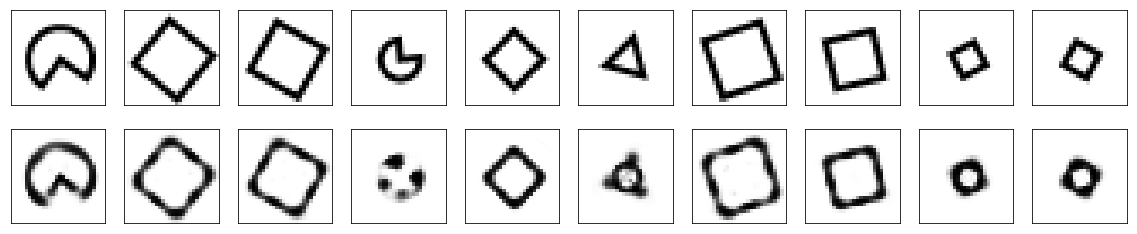

In [17]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
def acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    print(D)
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    print(w)
    from sklearn.utils.linear_assignment_ import linear_assignment
    ind = linear_assignment(w.max() - w)
    print([w[i, j] for i, j in ind])
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [19]:
from  sklearn import metrics
from sklearn.cluster import KMeans
result = np.zeros((len(y_test), 2))
for index, item in enumerate(y_test):
    result[index] = (y_test[index], np.max(encoded_imgs[index]))

kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))
print(acc(y_test, y_pred))
result.shape

3
[[ 877 1073  737]
 [1593 1092  752]
 [ 920 1128 1828]]
[1073, 1593, 1828]
0.4494


(10000, 2)

In [20]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.3391 - val_loss: 0.2950
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2960 - val_loss: 0.2773
Epoch 3/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2780 - val_loss: 0.2562
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2686 - val_loss: 0.2573
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2649 - val_loss: 0.2398
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2628 - val_loss: 0.2360
Epoch 7/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2610 - val_loss: 0.2293
Epoch 8/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2592 - val_loss: 0.2190
Epoch 9/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.2573 - val_loss: 0.2

60000/60000 [==============================] - 1s 15us/step - loss: 0.0934 - val_loss: 0.1436
Epoch 78/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0931 - val_loss: 0.1440
Epoch 79/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0927 - val_loss: 0.1425
Epoch 80/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0925 - val_loss: 0.1476
Epoch 81/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0923 - val_loss: 0.1446
Epoch 82/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0920 - val_loss: 0.1464
Epoch 83/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0919 - val_loss: 0.1464
Epoch 84/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0915 - val_loss: 0.1478
Epoch 85/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0913 - val_loss: 0.1472
Epoch 86/100
60000/60000 [========================

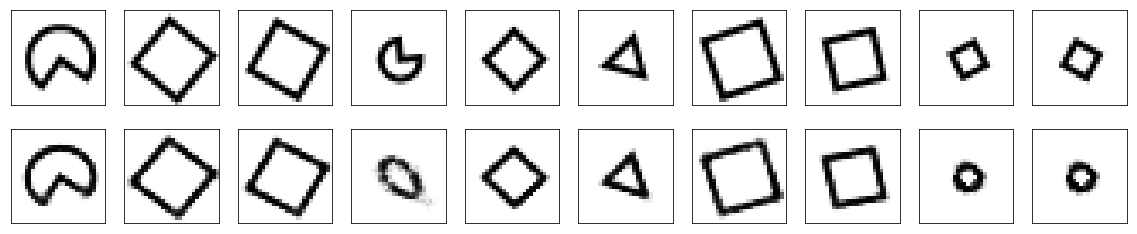

In [21]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))
print(acc(y_test, y_pred))
result.shape

3
[[1918 1467 1090]
 [1472 1092  782]
 [   0  734 1445]]
[1918, 1092, 1445]
0.4455


(10000, 2)

In [23]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [24]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.3023 - val_loss: 0.1871
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2051 - val_loss: 0.1553
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1735 - val_loss: 0.1430
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1561 - val_loss: 0.1311
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1461 - val_loss: 0.1274
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1390 - val_loss: 0.1232
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1333 - val_loss: 0.1228
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1295 - val_loss: 0.1213
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1266 - val_loss: 0.1209
Epoch

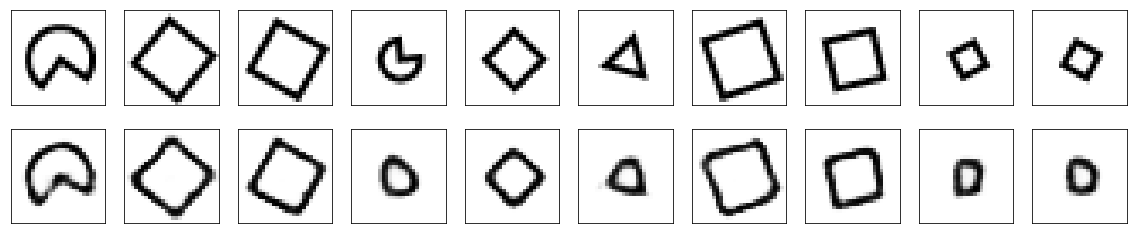

In [26]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
encoded_imgs = np.reshape(encoded_imgs, (len(x_test), 28*28*1))  # adapt this if using `channels_first` image data format


In [28]:
%%timeit
kmeans = KMeans(n_clusters=3, n_init=20)
y_pred = kmeans.fit_predict((encoded_imgs))

1 loop, best of 3: 5.49 s per loop


In [29]:
print(acc(y_test, y_pred))
result.shape

3
[[1918 1467 1090]
 [1472 1092  782]
 [   0  734 1445]]
[1918, 1092, 1445]
0.4455


(10000, 2)

In [30]:
x_train = np.reshape(x_train, (len(x_train), 28*28*1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28*28*1))  # adapt this if using `channels_first` image data format
est = KMeans(n_clusters=3, n_jobs=20)
y_pred = est.fit(x_train).predict(x_test)

In [31]:
print(acc(y_test, y_pred))

3
[[ 457  557 1424]
 [ 278  915  677]
 [2655 1821 1216]]
[1424, 915, 2655]
0.4994


In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [33]:
%%timeit
pca = PCA(n_components=3).fit(x_train)
est = KMeans(init=pca.components_, n_clusters=3, n_init=20)
y_pred = est.fit(x_train).predict(x_test)

/usr/local/lib/python2.7/dist-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=20
  return_n_iter=True)


1 loop, best of 3: 4.85 s per loop


In [34]:
print(acc(y_test, y_pred))

3
[[ 457  557 1424]
 [ 278  915  677]
 [2655 1821 1216]]
[1424, 915, 2655]
0.4994


In [35]:
print "Doing PCA would improve performance by", np.round(((5.5-4.83)/5.5)*100, 2)

Doing PCA would improve performance by 12.18


In [36]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [37]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [38]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3210299770320450676
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7422230528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 915310821641542645
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [39]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [40]:

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [41]:
x_train = np.reshape(x_train, (len(x_train), 28,28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28,28, 1))  

In [42]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
batch_size=10
u = datagen.flow(x_train, y_train, batch_size=32)

model.fit(x=x_train, y=y_train, batch_size = batch_size, epochs = 3)

ValueError: Error when checking input: expected input_5 to have shape (None, None, None, 3) but got array with shape (60000, 28, 28, 1)

In [ ]:

# train the model on the new data for a few epochs
model.fit_generator(x=x_train)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit_generator(x_test)

In [ ]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [ ]:
# InceptionV3 for a new dataset

# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/
# inception_v3_weights_tf_dim_ordering_tf_kernels.h5
# inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

iv3_base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(140, 140, 3))
x = iv3_base_model.output

x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

y = Dense(3, activation='softmax')(x)

iv3_model = Model(inputs=iv3_base_model.input, outputs=y)

In [ ]:
# Unfreeze InceptionV3 convolutional layers 
for layer in iv3_model.layers[:173]:
    layer.trainable = False
for layer in iv3_model.layers[173:]:
    layer.trainable = True
    
iv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])     

In [ ]:
from keras.preprocessing import image as keras_image
steps, epochs = 200, 5
data_generator = \
keras_image.ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
checkpointer = \
keras.callbacks.ModelCheckpoint(filepath='weights.best.iv3_model.hdf5', verbose=2, save_best_only=True)
lr_reduction = \
keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)
with tf.device('/gpu:0'):
    history = iv3_model.fit_generator(data_generator.flow(x_train, y_train, batch_size=16), 
                                      steps_per_epoch = steps, epochs = epochs, 
                                      callbacks=[checkpointer, lr_reduction])
                                      #validation_data = (x_test, y_test))

In [ ]:
# Evaluate 
iv3_model.load_weights('weights.best.iv3_model.hdf5')
iv3_test_scores = iv3_model.evaluate(x_test7, c_y_test7)
print("Accuracy: %.2f%%" % (iv3_test_scores[1]*100))

In [ ]:
from IPython.display import SVG
from keras.applications.inception_v3 import InceptionV3
from keras.utils.vis_utils import model_to_dot
inception_model = InceptionV3(weights='imagenet', include_top=False)
SVG(model_to_dot(inception_model).create(prog='dot', format='svg'))

In [ ]:
# check the layers by name
for i,layer in enumerate(inception_model.layers):
    print(i,layer.name)

In [ ]:
## import random
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
import numpy as np

# read data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
# limit the amount of the data
# train data
ind_train = random.sample(list(range(x_train.shape[0])), 2000)
x_train = x_train[ind_train]
y_train = y_train[ind_train]

# test data
ind_test = random.sample(list(range(x_test.shape[0])), 2000)
x_test = x_test[ind_test]
y_test = y_test[ind_test]

def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 140, 140, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled



In [ ]:
from keras.utils import to_categorical
# resize train and  test data
x_train_resized = (x_train)
#x_test_resized = resize_data(x_test)

# make explained variable hot-encoded
y_train_hot_encoded = to_categorical(y_train)
#y_test_hot_encoded = to_categorical(y_test)

In [ ]:
inc_model = InceptionV3(weights='imagenet', include_top=False)

# get layers and add average pooling layer
x = inc_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)

# add output layer
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inc_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in inc_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x_train, y_train_hot_encoded)

In [ ]:
from keras.optimizers import SGD

In [ ]:

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:279]:
    layer.trainable = False

for layer in model.layers[279:]:
    layer.trainable = True

# training
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_resized, y_train_hot_encoded, batch_size=128, epochs=5, shuffle=True,  validation_split=0.3)

In [ ]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)

In [ ]:
y_train_hot_encoded = to_categorical(y_test)
x_test = np.reshape(to_rgb5(x_test), (len(x_test), 28,28, 3))

In [ ]:
iv3_test_scores = model.evaluate(x_test, y_train_hot_encoded)
print("Accuracy: %.2f%%" % (iv3_test_scores[1]*100))

In [ ]:
vectortoimg(x_train[1])

In [ ]:
x_train[1].shape
Orig = x_train

In [ ]:
x_train = Orig

x_train = np.reshape(x_train, (len(x_train), 28,28, 1))  # adapt this if using `channels_first` image data format
x_train.shape

In [ ]:
def to_rgb5(im):
    im.resize((im.shape[0], im.shape[1], 1))
    return np.repeat(im.astype(np.uint8), 3, 2)

In [ ]:
to_rgb5(x_train).shape

In [ ]:
x_train = np.reshape(to_rgb5(x_train), (len(x_train), 28,28, 3))

In [ ]:
x_train.shape

In [ ]:
def vectortoimg_3(v,show=True):
    plt.imshow(v.reshape(28, 28,3),interpolation='None', cmap='gray')
    plt.axis('off')
    if show:
        plt.show()

In [ ]:
vectortoimg_3(x_train[1])

In [ ]:
print("Checking multiple training vectors by plotting images.\nBe patient:")
plt.close('all')
fig = plt.figure(figsize=(10,10))
nrows=15
ncols=15
for row in range(nrows):
    for col in range(ncols):
        plt.subplot(nrows, ncols, row*ncols+col + 1)
        vectortoimg_3(x_train[np.random.randint(len(y_train))],show=False)
plt.show()

In [ ]:
def resize_data(data):
    import cv2
    data_upscaled = np.zeros((data.shape[0], 140, 140, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

In [ ]:
x_train_temp = resize_data(x_train)

In [ ]:
x_train_temp.shape

In [ ]:
vectortoimg_3(x_train[1])

In [ ]:
x_train = x_train_temp

In [ ]:
y_train.shape